In [33]:
import os
import shutil
import random
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [13]:
os.chdir('..')

In [14]:
os.listdir('.')

['.git',
 '.gitignore',
 '.vscode',
 'app',
 'bash.exe.stackdump',
 'data',
 'haarcascades',
 'models',
 'notebook',
 'README.md',
 'requirements.txt',
 'venv']

In [4]:
race_dirs = os.listdir('./valid')

In [11]:
for i in race_dirs:
    os.makedirs('train/' + i)
    os.makedirs('test/' + i)
    os.makedirs('valid/' + i)

In [13]:
train_path ='train'
valid_path='valid'
test_path='test'

In [26]:
for u in race_dirs:
    total_by_folder = len(os.listdir('base/' + u))
    
    for i in random.sample(glob.glob('base/' + u + '/*'), round(total_by_folder * 0.80)):
        shutil.move(i, 'train/' + u)
        
    for i in random.sample(glob.glob('base/' + u + '/*'), total_by_folder):
        shutil.move(i, 'valid/' + u) 

## Insertion donnée de test

In [6]:
for u in race_dirs:
    total_by_folder = len(os.listdir('valid/' + u))
    
    for i in random.sample(glob.glob('valid/' + u + '/*'), total_by_folder):
        shutil.copy(i, 'test/' + u)
        

In [15]:
BASEPATH = "./data/test/"

LABELS = set()

paths = []

for d in os.listdir(BASEPATH):
    LABELS.add(d)
    paths.append((BASEPATH+d, d))

In [17]:
paths

[('./data/test/n02085620-Chihuahua', 'n02085620-Chihuahua'),
 ('./data/test/n02085782-Japanese_spaniel', 'n02085782-Japanese_spaniel'),
 ('./data/test/n02085936-Maltese_dog', 'n02085936-Maltese_dog'),
 ('./data/test/n02086079-Pekinese', 'n02086079-Pekinese'),
 ('./data/test/n02086240-Shih-Tzu', 'n02086240-Shih-Tzu'),
 ('./data/test/n02086646-Blenheim_spaniel', 'n02086646-Blenheim_spaniel'),
 ('./data/test/n02086910-papillon', 'n02086910-papillon'),
 ('./data/test/n02087046-toy_terrier', 'n02087046-toy_terrier'),
 ('./data/test/n02087394-Rhodesian_ridgeback',
  'n02087394-Rhodesian_ridgeback'),
 ('./data/test/n02088094-Afghan_hound', 'n02088094-Afghan_hound'),
 ('./data/test/n02088238-basset', 'n02088238-basset'),
 ('./data/test/n02088364-beagle', 'n02088364-beagle'),
 ('./data/test/n02088466-bloodhound', 'n02088466-bloodhound'),
 ('./data/test/n02088632-bluetick', 'n02088632-bluetick'),
 ('./data/test/n02089078-black-and-tan_coonhound',
  'n02089078-black-and-tan_coonhound'),
 ('./data

In [21]:
def load_and_preprocess_image(path):
    image = cv2.imread(path)
    image = cv2.resize(image, (150,150))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [22]:
X = []
y = []

for path, label in paths:
    for image_path in os.listdir(path):
        image = load_and_preprocess_image(path+"/"+image_path)
        
        X.append(image)
        y.append(label)

In [29]:
encoder = LabelBinarizer()

X = np.array(X)
y = encoder.fit_transform(np.array(y))

(4111, 150, 150, 3)
(4111, 120)


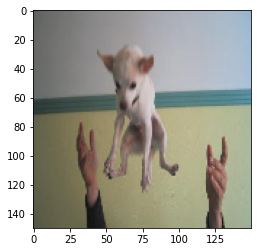

In [34]:
print(X.shape)
print(y.shape)
plt.imshow(X[0])